<a href="https://colab.research.google.com/github/habib671/marraige-prediction-of-student-using-machine-learning-/blob/main/Marraige_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A prediction of marriage probability in student life in Bangladesh **

#**Mount the drive and read the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:





train = pd.read_csv('gdrive/My Drive/AI Project/dataset.csv')

In [ ]:
train.head()

,Timestamp,বয়স :,লিঙ্গ :,ধর্ম :,ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহমত?,আপনি পড়াশুনার কোন পর্যায়ে আছেন?,আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?,আপনার মতে কোনটা আগে?,আপনার বর্তমান আয়ের উৎস কি?,আপনার পরিবারের আয়ের উৎস কি?,আপনার পারিবারিক অবস্থা কি?,আপনি কি যৌথ পরিবারের সদস্য?,আপনার পরিবারের সদস্য সংখ্যা কত?,আপনার বাবা-মা উভয়ই আছেন?,আপনার ভাই-বোন কয় জন?,আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?,আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?,আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?,পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?,আপনার বৈবাহিক অবস্থা কি?,আপনি কখন বিয়ে করতে ইচ্ছুক,পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?,আপনি কি রিলেশনশিপ এ আছেন?,"যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?",আপনি কত বছর আগে বিয়ে করেছেন?,এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?,লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?
0,3/4/2021 1:43:42,25.0,পুরুষ,ইসলাম,3,বিশ্ববিদ্যালয়,না,বিয়ে,বাপের হোটেল,সরকারি চাকরি,মধ্যবিত্ত,না,4,"হ্যাঁ, আছেন",2,2,2,90%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,হ্যাঁ,হ্যাঁ,উভয় পরিবার জানে এবং রাজি,NaN,NaN,NaN
1,3/4/2021 1:45:25,22.0,পুরুষ,ইসলাম,3,কলেজ,না,ক্যারিয়ার,ফ্রিল্যান্সিং,বেসরকারি চাকরি,মধ্যবিত্ত,হ্যাঁ,3,"হ্যাঁ, আছেন",3,2,1,50%,না,অবিবাহিত,চাকরি পাওয়ার পর,হ্যাঁ,না,কোনভাবেই রাজি হবে না,NaN,NaN,NaN
2,3/4/2021 2:04:13,22.0,মহিলা,ইসলাম,3,মেডিকেল,না,বিয়ে,চাকরি,সরকারি চাকরি,উচ্চ মধ্যবিত্ত,হ্যাঁ,4,"হ্যাঁ, আছেন",2,4,3,70%,হ্যাঁ,বিবাহিত,NaN,NaN,NaN,NaN,1.0,লাভ ❤,"ছিল, মানিয়ে নিয়েছি 😁"
3,3/4/2021 2:53:20,23.0,পুরুষ,ইসলাম,3,বিশ্ববিদ্যালয়,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,6,বাবা নেই,3,1,1,20%,হ্যাঁ,বিধবা / বিপত্নীক,৩ বছর এর মধ্যে,না,না,"কোন রিলেশন নেই, এরেঞ্জ ম্যারেজ করার ইচ্ছা",1.0,লাভ ❤,NaN
4,3/17/2021 17:57:37,23.0,পুরুষ,ইসলাম,3,অনার্স,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,4,মা নেই,2,2,1,50%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,হ্যাঁ,হ্যাঁ,কোনভাবেই রাজি হবে না,NaN,NaN,NaN


**Replacing all empty values(NaN) with Zero(0)**

In [ ]:
train.fillna(0)

,Timestamp,বয়স :,লিঙ্গ :,ধর্ম :,ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহমত?,আপনি পড়াশুনার কোন পর্যায়ে আছেন?,আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?,আপনার মতে কোনটা আগে?,আপনার বর্তমান আয়ের উৎস কি?,আপনার পরিবারের আয়ের উৎস কি?,আপনার পারিবারিক অবস্থা কি?,আপনি কি যৌথ পরিবারের সদস্য?,আপনার পরিবারের সদস্য সংখ্যা কত?,আপনার বাবা-মা উভয়ই আছেন?,আপনার ভাই-বোন কয় জন?,আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?,আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?,আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?,পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?,আপনার বৈবাহিক অবস্থা কি?,আপনি কখন বিয়ে করতে ইচ্ছুক,পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?,আপনি কি রিলেশনশিপ এ আছেন?,"যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?",আপনি কত বছর আগে বিয়ে করেছেন?,এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?,লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?
0,3/4/2021 1:43:42,25.0,পুরুষ,ইসলাম,3,বিশ্ববিদ্যালয়,না,বিয়ে,বাপের হোটেল,সরকারি চাকরি,মধ্যবিত্ত,না,4,"হ্যাঁ, আছেন",2,2,2,90%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,হ্যাঁ,হ্যাঁ,উভয় পরিবার জানে এবং রাজি,0.0,0,0
1,3/4/2021 1:45:25,22.0,পুরুষ,ইসলাম,3,কলেজ,না,ক্যারিয়ার,ফ্রিল্যান্সিং,বেসরকারি চাকরি,মধ্যবিত্ত,হ্যাঁ,3,"হ্যাঁ, আছেন",3,2,1,50%,না,অবিবাহিত,চাকরি পাওয়ার পর,হ্যাঁ,না,কোনভাবেই রাজি হবে না,0.0,0,0
2,3/4/2021 2:04:13,22.0,মহিলা,ইসলাম,3,মেডিকেল,না,বিয়ে,চাকরি,সরকারি চাকরি,উচ্চ মধ্যবিত্ত,হ্যাঁ,4,"হ্যাঁ, আছেন",2,4,3,70%,হ্যাঁ,বিবাহিত,0,0,0,0,1.0,লাভ ❤,"ছিল, মানিয়ে নিয়েছি 😁"
3,3/4/2021 2:53:20,23.0,পুরুষ,ইসলাম,3,বিশ্ববিদ্যালয়,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,6,বাবা নেই,3,1,1,20%,হ্যাঁ,বিধবা / বিপত্নীক,৩ বছর এর মধ্যে,না,না,"কোন রিলেশন নেই, এরেঞ্জ ম্যারেজ করার ইচ্ছা",1.0,লাভ ❤,0
4,3/17/2021 17:57:37,23.0,পুরুষ,ইসলাম,3,অনার্স,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,4,মা নেই,2,2,1,50%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,হ্যাঁ,হ্যাঁ,কোনভাবেই রাজি হবে না,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,4/1/2021 12:29:15,22.0,পুরুষ,ইসলাম,3,অনার্স,না,ক্যারিয়ার,বাপের হোটেল,বেসরকারি চাকরি,মধ্যবিত্ত,না,5,"হ্যাঁ, আছেন",2,1,0,40%,হ্যাঁ,অবিবাহিত,যেকোনো আয়ের উৎস করার পর,না,না,মনাতে পারব,0.0,0,0
263,4/1/2021 13:21:28,23.0,মহিলা,ইসলাম,3,অনার্স,না,ক্যারিয়ার,বাপের হোটেল,সরকারি চাকরি,মধ্যবিত্ত,হ্যাঁ,5,"হ্যাঁ, আছেন",3,3,0,10%,হ্যাঁ,অবিবাহিত,৩ বছর এর মধ্যে,হ্যাঁ,হ্যাঁ,সহজেই রাজি হবে,0.0,0,0
264,4/1/2021 14:21:55,23.0,মহিলা,ইসলাম,3,অনার্স,না,ক্যারিয়ার,বাপের হোটেল,বেসরকারি চাকরি,নিম্ন মধ্যবিত্ত,হ্যাঁ,5,"হ্যাঁ, আছেন",3,3,1,10%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,না,হ্যাঁ,"রাজি হবে না, পালিয়ে বিয়ে করতে ইচ্ছুক",0.0,0,0
265,4/1/2021 18:33:14,19.0,মহিলা,ইসলাম,3,কলেজ,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,5,বাবা নেই,1,1,0,40%,হ্যাঁ,তালাকপ্রাপ্ত,0,0,0,0,2.0,এরেঞ্জ,0


**Number of columns and rows using .shape**

In [ ]:
train.shape

(267, 27)

**All the information from our Dataset using .info()**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 27 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Timestamp                                                                                              267 non-null    object 
 1   বয়স :                                                                                                  267 non-null    float64
 2   লিঙ্গ :                                                                                                267 non-null    object 
 3   ধর্ম :                                                                                                 267 non-null    object 
 4   ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহ

#**Data Pre-proccessing**

#**Value count for all the attributes **

In [ ]:
train['বয়স :'].value_counts()

23.0    67
22.0    62
24.0    56
25.0    28
21.0    21
20.0    14
27.0     5
26.0     4
19.0     3
18.0     2
28.0     1
35.0     1
17.0     1
32.0     1
22.5     1
Name: বয়স :, dtype: int64

In [ ]:
train['লিঙ্গ :'].value_counts()

পুরুষ       230
মহিলা        36
অন্যান্য      1
Name: লিঙ্গ :, dtype: int64

In [ ]:
train['ধর্ম :'].value_counts()

ইসলাম     253
হিন্দু     13
বৌদ্ধ       1
Name: ধর্ম :, dtype: int64

In [ ]:
train['ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহমত?'].value_counts()

3    224
2     27
0      9
1      7
Name: ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহমত?, dtype: int64

In [ ]:
train['আপনি পড়াশুনার কোন পর্যায়ে আছেন?'].value_counts()

অনার্স               215
পড়াশুনা শেষ           24
মাস্টার্স             14
কলেজ                   6
পড়াশুনা অসম্পূর্ণ      4
মেডিকেল                2
বিশ্ববিদ্যালয়          2
Name: আপনি পড়াশুনার কোন পর্যায়ে আছেন?, dtype: int64

In [ ]:
train['আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?'].value_counts()

না       243
হ্যাঁ     24
Name: আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?, dtype: int64

In [ ]:
train['আপনার মতে কোনটা আগে?'].value_counts()

ক্যারিয়ার     129
বিয়ে          129
ক্যারিয়ার      7
বিয়ে           2
Name: আপনার মতে কোনটা আগে?, dtype: int64

In [ ]:
train['আপনার বর্তমান আয়ের উৎস কি?'].value_counts()

বাপের হোটেল       185
পার্ট টাইম জব      25
চাকরি              23
ফ্রিল্যান্সিং      18
ব্যবসা              9
অনলাইন ব্যাবসা      7
Name: আপনার বর্তমান আয়ের উৎস কি?, dtype: int64

In [ ]:
train['আপনার পরিবারের আয়ের উৎস কি?'].value_counts()

ব্যবসা              80
সরকারি চাকরি        77
বেসরকারি চাকরি      45
অন্যান্য            39
কৃষি                14
কোন আয়ের উৎস নেই    12
Name: আপনার পরিবারের আয়ের উৎস কি?, dtype: int64

In [ ]:
train['আপনার পারিবারিক অবস্থা কি?'].value_counts()

মধ্যবিত্ত          174
নিম্ন মধ্যবিত্ত     52
উচ্চ মধ্যবিত্ত      38
নিম্নবিত্ত           2
উচ্চবিত্ত            1
Name: আপনার পারিবারিক অবস্থা কি?, dtype: int64

In [ ]:
train['আপনি কি যৌথ পরিবারের সদস্য?'].value_counts()

না       209
হ্যাঁ     58
Name: আপনি কি যৌথ পরিবারের সদস্য?, dtype: int64

In [ ]:
train['আপনার পরিবারের সদস্য সংখ্যা কত?'].value_counts()

4     91
5     76
6     33
3     28
7     18
8      7
9      6
15     2
12     2
35     1
18     1
10     1
2      1
Name: আপনার পরিবারের সদস্য সংখ্যা কত?, dtype: int64

In [ ]:
train['আপনার বাবা-মা উভয়ই আছেন?'].value_counts()

হ্যাঁ, আছেন    242
বাবা নেই        21
মা নেই           3
উভয়ই নেই         1
Name: আপনার বাবা-মা উভয়ই আছেন?, dtype: int64

In [ ]:
train['আপনার ভাই-বোন কয় জন?'].value_counts()

2     93
3     64
1     64
4     22
0     12
5      7
6      3
14     1
8      1
Name: আপনার ভাই-বোন কয় জন?, dtype: int64

In [ ]:
train['আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?'].value_counts()

1     125
2      86
3      38
4      10
5       5
12      1
8       1
6       1
Name: আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?, dtype: int64

In [ ]:
train['আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?'].value_counts()

0     142
1      76
2      31
3       9
4       6
7       2
10      1
Name: আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?, dtype: int64

In [ ]:
train['আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?'].value_counts()

10%     105
30%      48
20%      42
40%      29
90%      10
50%      10
60%       8
70%       7
80%       7
100%      1
Name: আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?, dtype: int64

In [ ]:
train['পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?'].value_counts()

হ্যাঁ    142
না       125
Name: পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?, dtype: int64

In [ ]:
train['আপনার বৈবাহিক অবস্থা কি?'].value_counts()

অবিবাহিত            234
বিবাহিত              30
তালাকপ্রাপ্ত          2
বিধবা / বিপত্নীক      1
Name: আপনার বৈবাহিক অবস্থা কি?, dtype: int64

In [ ]:
train['আপনি কখন বিয়ে করতে ইচ্ছুক'].value_counts()

যেকোনো আয়ের উৎস করার পর    64
এই পর্যায়েই                56
চাকরি পাওয়ার পর            40
৫ বছর এর মধ্যে             25
৩ বছর এর মধ্যে             23
১ বছর এর মধ্যে             21
বাড়ি করার পর                6
Name: আপনি কখন বিয়ে করতে ইচ্ছুক, dtype: int64

In [ ]:
train['পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?'].value_counts()

না       179
হ্যাঁ     56
Name: পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?, dtype: int64

In [ ]:
train['আপনি কি রিলেশনশিপ এ আছেন?'].value_counts()

না       165
হ্যাঁ     70
Name: আপনি কি রিলেশনশিপ এ আছেন?, dtype: int64

In [ ]:
train['যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?'].value_counts()

কোন রিলেশন নেই, এরেঞ্জ ম্যারেজ করার ইচ্ছা    67
মনাতে পারব                                   57
বিয়ে/রিলেশন নিয়ে কোন মাথা ব্যাথা নেই         46
কোনভাবেই রাজি হবে না                         30
সহজেই রাজি হবে                               22
উভয় পরিবার জানে এবং রাজি                     10
রাজি হবে না, পালিয়ে বিয়ে করতে ইচ্ছুক          3
Name: যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?, dtype: int64

In [ ]:
train['আপনি কত বছর আগে বিয়ে করেছেন?'].value_counts()

1.0     12
2.0      7
0.0      4
4.0      3
3.0      3
0.3      1
21.0     1
2.5      1
12.0     1
Name: আপনি কত বছর আগে বিয়ে করেছেন?, dtype: int64

In [ ]:
train['এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?'].value_counts()

লাভ ❤     23
এরেঞ্জ    10
Name: এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?, dtype: int64

In [ ]:
train['লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?'].value_counts()

ছিল, মানিয়ে নিয়েছি 😁              12
না, মেনে নিয়েছে                   11
ছিল, পরিবার কে না জানিয়ে করেছি     3
Name: লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?, dtype: int64

#**Translating to English and assigning Numeric Values**

In [ ]:
train_data = [train]
age = {17.0: 0, 18.0: 0, 19.0: 1,20.0:1,21.0:1,22.0:2,23.0:2,24.0:2,25.0:3,26.0:3,27.0:3,28.0:3,32.0:4,35.0:4}
for new_train in train_data:
    new_train['Age'] = new_train['বয়স :'].map(age)

In [ ]:
new_train

In [ ]:
train_df = [new_train]
sex = {"পুরুষ": 0, "মহিলা": 1, "অন্যান্য": 1}
for new_df in train_df:
    new_df['Sex'] = new_df['লিঙ্গ :'].map(sex)

In [ ]:
train_df = [new_train]
religion = {"ইসলাম":1,"হিন্দু":2,"বৌদ্ধ":3}
for new_df in train_df:
    new_df['Religion'] = new_df['ধর্ম :'].map(religion)

In [ ]:
new_train = new_train.rename(columns={'ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহমত?': 'Priority of marraige in Islam'})

In [ ]:
train_df = [new_train]
study = {"কলেজ":1,"অনার্স":2,"বিশ্ববিদ্যালয়":2,"মাস্টার্স":3,"মেডিকেল":4,"পড়াশুনা শেষ":5,"পড়াশুনা অসম্পূর্ণ":6}
for new_df in train_df:
    new_df['Study Stage'] = new_df['আপনি পড়াশুনার কোন পর্যায়ে আছেন?'].map(study)

In [ ]:
new_train.drop('আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?', axis='columns', inplace=True)

In [ ]:
train_df = [new_train]
relationship = {"হ্যাঁ":1,"না":0}
for new_df in train_df:
    new_df['Relationship'] = new_df['আপনি কি রিলেশনশিপ এ আছেন?'].map(relationship)

In [ ]:
train_df = [new_train]
pers = {"বাপের হোটেল":0, "অনলাইন ব্যাবসা":1, "ব্যবসা":1, "ফ্রিল্যান্সিং":1, "চাকরি":1, "পার্ট টাইম জব":1}
for new_df in train_df:
    new_df['Personal Income'] = new_df['আপনার বর্তমান আয়ের উৎস কি?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {"ব্যবসা":1, "সরকারি চাকরি":1, "বেসরকারি চাকরি":1, "অন্যান্য":1, "কৃষি":1, "কোন আয়ের উৎস নেই":0}
for new_df in train_df:
    new_df['Family Income'] = new_df['আপনার পরিবারের আয়ের উৎস কি?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {"নিম্নবিত্ত":0, "নিম্ন মধ্যবিত্ত":1, "মধ্যবিত্ত":1, "উচ্চ মধ্যবিত্ত":1, "উচ্চবিত্ত":2}
for new_df in train_df:
    new_df['Family Status'] = new_df['আপনার পারিবারিক অবস্থা কি?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {"হ্যাঁ":1, "না":0}
for new_df in train_df:
    new_df['Joint Family'] = new_df['আপনি কি যৌথ পরিবারের সদস্য?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {2:0,3:0,4:0,5:1,6:1,7:1,8:2,9:2,10:2,12:3,15:3,18:3,35:3}
for new_df in train_df:
    new_df['Family Members'] = new_df['আপনার পরিবারের সদস্য সংখ্যা কত?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {"হ্যাঁ, আছেন":3, "বাবা নেই":1, "মা নেই": 2, "উভয়ই নেই":0}
for new_df in train_df:
    new_df['Parents alive'] = new_df['আপনার বাবা-মা উভয়ই আছেন?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {0:0,1:1,2:1,3:2,4:2,5:3,6:3,7:4,8:4,9:4,14:4}
for new_df in train_df:
    new_df['Siblings'] = new_df['আপনার ভাই-বোন কয় জন?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {0:0,00:0,0:0,1:1,1:1,2:2,3:3,4:4,7:4,10:5,14:4}
for new_df in train_df:
    new_df['Married Siblings'] = new_df['আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {"হ্যাঁ":1,"না":0}
for new_df in train_df:
    new_df['Previous relationship'] = new_df['পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {"অবিবাহিত":0,"বিবাহিত":1,"তালাকপ্রাপ্ত":1,"বিধবা / বিপত্নীক":1}
for new_df in train_df:
    new_df['Married status'] = new_df['আপনার বৈবাহিক অবস্থা কি?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {"এই পর্যায়েই":0,"যেকোনো আয়ের উৎস করার পর":1,"চাকরি পাওয়ার পর":2,"বাড়ি করার পর":3, "১ বছর এর মধ্যে":4,"৩ বছর এর মধ্যে":5,"৫ বছর এর মধ্যে":6}
for new_df in train_df:
    new_df['Target getting married'] = new_df['আপনি কখন বিয়ে করতে ইচ্ছুক'].map(pers)

In [ ]:
train_df = [new_train]
pers = {"বিয়ে/রিলেশন নিয়ে কোন মাথা ব্যাথা নেই":1,"কোন রিলেশন নেই, এরেঞ্জ ম্যারেজ করার ইচ্ছা":1,"মনাতে পারব":1,"সহজেই রাজি হবে":1,"উভয় পরিবার জানে এবং রাজি":1,"কোনভাবেই রাজি হবে না":0}
for new_df in train_df:
    new_df['Family agree on relationship'] = new_df['যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?'].map(pers)

In [ ]:
train_df = [new_train]
pers = {"লাভ ❤":1,"এরেঞ্জ":2}
for new_df in train_df:
    new_df['Arrange/love marriage'] = new_df['এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?'].map(pers)

In [ ]:
new_train

,Timestamp,বয়স :,লিঙ্গ :,ধর্ম :,ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহমত?,আপনি পড়াশুনার কোন পর্যায়ে আছেন?,আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?,আপনার মতে কোনটা আগে?,আপনার বর্তমান আয়ের উৎস কি?,আপনার পরিবারের আয়ের উৎস কি?,আপনার পারিবারিক অবস্থা কি?,আপনি কি যৌথ পরিবারের সদস্য?,আপনার পরিবারের সদস্য সংখ্যা কত?,আপনার বাবা-মা উভয়ই আছেন?,আপনার ভাই-বোন কয় জন?,আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?,আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?,আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?,পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?,আপনার বৈবাহিক অবস্থা কি?,আপনি কখন বিয়ে করতে ইচ্ছুক,পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?,আপনি কি রিলেশনশিপ এ আছেন?,"যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?",আপনি কত বছর আগে বিয়ে করেছেন?,এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?,লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?,Age,Sex,Religion
0,3/4/2021 1:43:42,25.0,পুরুষ,ইসলাম,3,বিশ্ববিদ্যালয়,না,বিয়ে,বাপের হোটেল,সরকারি চাকরি,মধ্যবিত্ত,না,4,"হ্যাঁ, আছেন",2,2,2,90%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,হ্যাঁ,হ্যাঁ,উভয় পরিবার জানে এবং রাজি,NaN,NaN,NaN,3.0,0,1
1,3/4/2021 1:45:25,22.0,পুরুষ,ইসলাম,3,কলেজ,না,ক্যারিয়ার,ফ্রিল্যান্সিং,বেসরকারি চাকরি,মধ্যবিত্ত,হ্যাঁ,3,"হ্যাঁ, আছেন",3,2,1,50%,না,অবিবাহিত,চাকরি পাওয়ার পর,হ্যাঁ,না,কোনভাবেই রাজি হবে না,NaN,NaN,NaN,2.0,0,1
2,3/4/2021 2:04:13,22.0,মহিলা,ইসলাম,3,মেডিকেল,না,বিয়ে,চাকরি,সরকারি চাকরি,উচ্চ মধ্যবিত্ত,হ্যাঁ,4,"হ্যাঁ, আছেন",2,4,3,70%,হ্যাঁ,বিবাহিত,NaN,NaN,NaN,NaN,1.0,লাভ ❤,"ছিল, মানিয়ে নিয়েছি 😁",2.0,1,1
3,3/4/2021 2:53:20,23.0,পুরুষ,ইসলাম,3,বিশ্ববিদ্যালয়,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,6,বাবা নেই,3,1,1,20%,হ্যাঁ,বিধবা / বিপত্নীক,৩ বছর এর মধ্যে,না,না,"কোন রিলেশন নেই, এরেঞ্জ ম্যারেজ করার ইচ্ছা",1.0,লাভ ❤,NaN,2.0,0,1
4,3/17/2021 17:57:37,23.0,পুরুষ,ইসলাম,3,অনার্স,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,4,মা নেই,2,2,1,50%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,হ্যাঁ,হ্যাঁ,কোনভাবেই রাজি হবে না,NaN,NaN,NaN,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,4/1/2021 12:29:15,22.0,পুরুষ,ইসলাম,3,অনার্স,না,ক্যারিয়ার,বাপের হোটেল,বেসরকারি চাকরি,মধ্যবিত্ত,না,5,"হ্যাঁ, আছেন",2,1,0,40%,হ্যাঁ,অবিবাহিত,যেকোনো আয়ের উৎস করার পর,না,না,মনাতে পারব,NaN,NaN,NaN,2.0,0,1
263,4/1/2021 13:21:28,23.0,মহিলা,ইসলাম,3,অনার্স,না,ক্যারিয়ার,বাপের হোটেল,সরকারি চাকরি,মধ্যবিত্ত,হ্যাঁ,5,"হ্যাঁ, আছেন",3,3,0,10%,হ্যাঁ,অবিবাহিত,৩ বছর এর মধ্যে,হ্যাঁ,হ্যাঁ,সহজেই রাজি হবে,NaN,NaN,NaN,2.0,1,1
264,4/1/2021 14:21:55,23.0,মহিলা,ইসলাম,3,অনার্স,না,ক্যারিয়ার,বাপের হোটেল,বেসরকারি চাকরি,নিম্ন মধ্যবিত্ত,হ্যাঁ,5,"হ্যাঁ, আছেন",3,3,1,10%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,না,হ্যাঁ,"রাজি হবে না, পালিয়ে বিয়ে করতে ইচ্ছুক",NaN,NaN,NaN,2.0,1,1
265,4/1/2021 18:33:14,19.0,মহিলা,ইসলাম,3,কলেজ,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,5,বাবা নেই,1,1,0,40%,হ্যাঁ,তালাকপ্রাপ্ত,NaN,NaN,NaN,NaN,2.0,এরেঞ্জ,NaN,1.0,1,1


#**Droping all Bangla Columns**

In [ ]:
new_train2 = new_train.drop(['Timestamp','বয়স :','লিঙ্গ :','ধর্ম :','আপনি পড়াশুনার কোন পর্যায়ে আছেন?','আপনার মতে কোনটা আগে?','আপনার বর্তমান আয়ের উৎস কি?','আপনার পরিবারের আয়ের উৎস কি?','আপনার পারিবারিক অবস্থা কি?','আপনি কি যৌথ পরিবারের সদস্য?','আপনার পরিবারের সদস্য সংখ্যা কত?','আপনার বাবা-মা উভয়ই আছেন?','আপনার ভাই-বোন কয় জন?','আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?','আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?','আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?','পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?','আপনার বৈবাহিক অবস্থা কি?','আপনি কখন বিয়ে করতে ইচ্ছুক','পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?','আপনি কি রিলেশনশিপ এ আছেন?','যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?','আপনি কত বছর আগে বিয়ে করেছেন?','এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?','লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?'], axis = 1)

In [ ]:
new_train2

,Priority of marraige in Islam,Age,Sex,Religion,Study Stage,Relationship,Personal Income,Family Income,Family Status,Joint Family,Family Members,Parents alive,Siblings,Married Siblings,Previous relationship,Married status,Target getting married,Family agree on relationship,Arrange/love marriage
0,3,3.0,0,1,2,1.0,0,1,1,0,0,3,1,2,1,0,0.0,1.0,NaN
1,3,2.0,0,1,1,0.0,1,1,1,1,0,3,2,1,0,0,2.0,0.0,NaN
2,3,2.0,1,1,4,NaN,1,1,1,1,0,3,1,3,1,1,NaN,NaN,1.0
3,3,2.0,0,1,2,0.0,0,0,1,0,1,1,2,1,1,1,5.0,1.0,1.0
4,3,2.0,0,1,2,1.0,0,0,1,0,0,2,1,1,1,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,3,2.0,0,1,2,0.0,0,1,1,0,1,3,1,0,1,0,1.0,1.0,NaN
263,3,2.0,1,1,2,1.0,0,1,1,1,1,3,2,0,1,0,5.0,1.0,NaN
264,3,2.0,1,1,2,1.0,0,1,1,1,1,3,2,1,1,0,0.0,NaN,NaN
265,3,1.0,1,1,1,NaN,0,0,1,0,1,1,1,0,1,1,NaN,NaN,2.0


#**Replacing Nan(empty values) with zero(0)**

In [ ]:
new_train2.fillna(0)

,Priority of marraige in Islam,Age,Sex,Religion,Study Stage,Relationship,Personal Income,Family Income,Family Status,Joint Family,Family Members,Parents alive,Siblings,Married Siblings,Previous relationship,Married status,Target getting married,Family agree on relationship,Arrange/love marriage
0,3,3.0,0,1,2,1.0,0,1,1,0,0,3,1,2,1,0,0.0,1.0,0.0
1,3,2.0,0,1,1,0.0,1,1,1,1,0,3,2,1,0,0,2.0,0.0,0.0
2,3,2.0,1,1,4,0.0,1,1,1,1,0,3,1,3,1,1,0.0,0.0,1.0
3,3,2.0,0,1,2,0.0,0,0,1,0,1,1,2,1,1,1,5.0,1.0,1.0
4,3,2.0,0,1,2,1.0,0,0,1,0,0,2,1,1,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,3,2.0,0,1,2,0.0,0,1,1,0,1,3,1,0,1,0,1.0,1.0,0.0
263,3,2.0,1,1,2,1.0,0,1,1,1,1,3,2,0,1,0,5.0,1.0,0.0
264,3,2.0,1,1,2,1.0,0,1,1,1,1,3,2,1,1,0,0.0,0.0,0.0
265,3,1.0,1,1,1,0.0,0,0,1,0,1,1,1,0,1,1,0.0,0.0,2.0


#**All columns information after converting to english**

In [ ]:
new_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Priority of marraige in Islam  267 non-null    int64  
 1   Age                            266 non-null    float64
 2   Sex                            267 non-null    int64  
 3   Religion                       267 non-null    int64  
 4   Study Stage                    267 non-null    int64  
 5   Relationship                   235 non-null    float64
 6   Personal Income                267 non-null    int64  
 7   Family Income                  267 non-null    int64  
 8   Family Status                  267 non-null    int64  
 9   Joint Family                   267 non-null    int64  
 10  Family Members                 267 non-null    int64  
 11  Parents alive                  267 non-null    int64  
 12  Siblings                       267 non-null    int

#**All data types using .dtypes**

In [ ]:
new_train2.dtypes

Priority of marraige in Islam      int64
Age                              float64
Sex                                int64
Religion                           int64
Study Stage                        int64
Relationship                     float64
Personal Income                    int64
Family Income                      int64
Family Status                      int64
Joint Family                       int64
Family Members                     int64
Parents alive                      int64
Siblings                           int64
Married Siblings                   int64
Previous relationship              int64
Married status                     int64
Target getting married           float64
Family agree on relationship     float64
Arrange/love marriage            float64
dtype: object

In [ ]:
new_train3 = new_train2.fillna(0)

#**Converting float data type to int using .astype(int)**

In [ ]:
new_train3['Relationship'] = new_train3['Relationship'].astype(int)

In [ ]:
new_train3['Age'] = new_train3['Age'].astype(int)

In [ ]:
new_train3['Target getting married'] = new_train3['Target getting married'].astype(int)

In [ ]:
new_train3['Family agree on relationship'] = new_train3['Family agree on relationship'].astype(int)

In [ ]:
new_train3['Arrange/love marriage'] = new_train3['Arrange/love marriage'].astype(int)

In [ ]:
new_train3

,Priority of marraige in Islam,Age,Sex,Religion,Study Stage,Relationship,Personal Income,Family Income,Family Status,Joint Family,Family Members,Parents alive,Siblings,Married Siblings,Previous relationship,Married status,Target getting married,Family agree on relationship,Arrange/love marriage
0,3,3,0,1,2,1,0,1,1,0,0,3,1,2,1,0,0,1,0
1,3,2,0,1,1,0,1,1,1,1,0,3,2,1,0,0,2,0,0
2,3,2,1,1,4,0,1,1,1,1,0,3,1,3,1,1,0,0,1
3,3,2,0,1,2,0,0,0,1,0,1,1,2,1,1,1,5,1,1
4,3,2,0,1,2,1,0,0,1,0,0,2,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,3,2,0,1,2,0,0,1,1,0,1,3,1,0,1,0,1,1,0
263,3,2,1,1,2,1,0,1,1,1,1,3,2,0,1,0,5,1,0
264,3,2,1,1,2,1,0,1,1,1,1,3,2,1,1,0,0,0,0
265,3,1,1,1,1,0,0,0,1,0,1,1,1,0,1,1,0,0,2


In [ ]:
new_train3.dtypes

Priority of marraige in Islam    int64
Age                              int64
Sex                              int64
Religion                         int64
Study Stage                      int64
Relationship                     int64
Personal Income                  int64
Family Income                    int64
Family Status                    int64
Joint Family                     int64
Family Members                   int64
Parents alive                    int64
Siblings                         int64
Married Siblings                 int64
Previous relationship            int64
Married status                   int64
Target getting married           int64
Family agree on relationship     int64
Arrange/love marriage            int64
dtype: object

#**Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#**Bar Chart using different attributes**

In [ ]:

def bar_chart(feature):
    married = new_train3[new_train3['Married status']==1][feature].value_counts()
    unmarried = new_train3[new_train3['Married status']==0][feature].value_counts()
    df = pd.DataFrame([married,unmarried])
    df.index = ['Married','Unmarried']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Here 0:Male and 1: Female

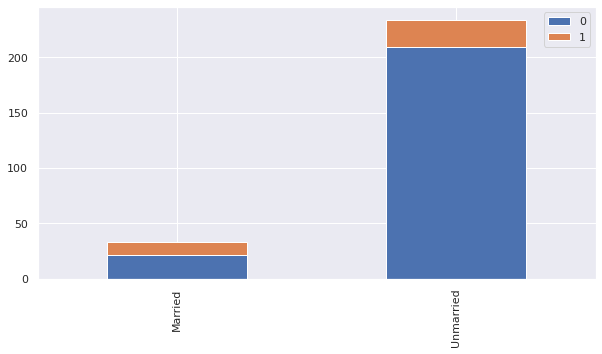

In [ ]:
bar_chart('Sex')

Here, 1: College , 2:Honours , 3: Masters , 4: Medical , 5:Completed , 6: Incomplete.

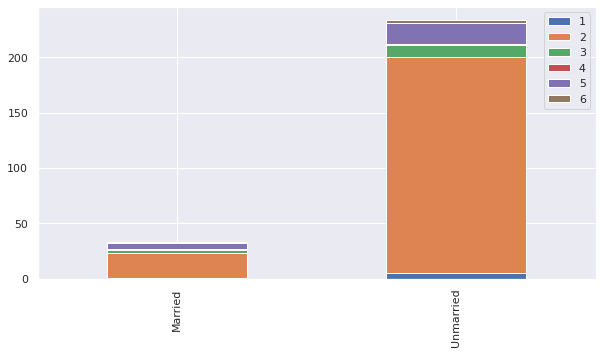

In [ ]:
bar_chart('Study Stage')